<a href="https://colab.research.google.com/github/saakethvishnumolak/Assignment3_SV/blob/main/Assignment3_SV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Reading the file

In [26]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Assignment3/customer_data.csv")

In [27]:
dataset.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [29]:
dataset.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

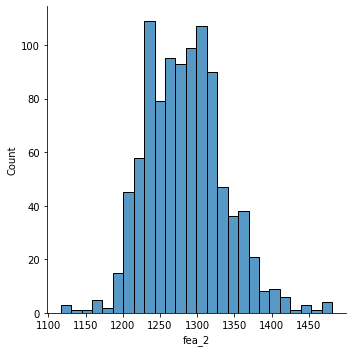

In [30]:
sb.displot(dataset['fea_2'])

### Filling in missing values

In [31]:
dataset['fea_2'] = dataset['fea_2'].fillna(dataset['fea_2'].mean())

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   1125 non-null   float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


## Splitting the dataset

The dependent variable is the label

In [33]:
dataset.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [34]:
X = dataset.drop('label', axis = 1)
y = dataset['label']

In [35]:
X.columns

Index(['id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7',
       'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

## train_test_split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scaling Dataset using Standard Scaler

In [37]:
from sklearn.preprocessing import StandardScaler
SC_x = StandardScaler()
X_train = SC_x.fit_transform(X_train)
X_test = SC_x.transform(X_test)

##Logistic Regression



In [38]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression(solver = 'liblinear', max_iter = 100, random_state = 0)
logistic_regressor.fit(X_train, y_train)
logistic_regressor.score(X_test, y_test)

0.7644444444444445

## SVC Classifier

In [39]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7644444444444445

##  Stratified K Fold Cross Validation


In [40]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
SKfold = StratifiedKFold(n_splits= 10)

In [41]:
result_SKfold = cross_val_score(SVC(), X, y, cv = SKfold)
print(result_SKfold)

[0.79646018 0.79646018 0.79646018 0.79646018 0.79646018 0.80357143
 0.80357143 0.80357143 0.80357143 0.80357143]


In [42]:
SKFold_score = np.mean(result_SKfold)
print(SKFold_score)

0.8000158027812896


## Repeated random Subsampling

In [43]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits = 10, test_size = 0.2)
result_split = cross_val_score(SVC(), X, y, cv = split)

In [44]:
split_score = np.mean(result_split)
print(split_score)

0.8084444444444445


## Randomized Search

In [45]:
from sklearn.model_selection import RandomizedSearchCV
param = {'solver': ['liblinear'],
         'C': [0.1, 1, 10, 100],
         'max_iter': [1000, 2000, 3000, 4000, 5000]
}

In [46]:
random_model = RandomizedSearchCV(logistic_regressor, param, verbose = 3, n_iter = 5)
random_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END C=10, max_iter=1000, solver=liblinear;, score=0.811 total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, solver=liblinear;, score=0.811 total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, solver=liblinear;, score=0.811 total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/5] END C=10, max_iter=1000, solver=liblinear;, score=0.806 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, solver=liblinear;, score=0.811 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, solver=liblinear;, score=0.811 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, solver=liblinear;, score=0.811 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, solver=liblinear;, score=0.806 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, solver=liblinear;, score=0.806 total time=   0.0s
[CV 1/5] END C=1, max_iter=3000, solver=liblinear;, score=0.811 total time=   0.0s
[CV 2/5] END

RandomizedSearchCV(estimator=LogisticRegression(random_state=0,
                                                solver='liblinear'),
                   n_iter=5,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'max_iter': [1000, 2000, 3000, 4000,
                                                     5000],
                                        'solver': ['liblinear']},
                   verbose=3)

In [57]:
random_score = random_model.best_score_
print(random_score)

0.8088888888888889


## Grid Search CV

In [48]:
from sklearn.model_selection import GridSearchCV
param = {'C': [0.1, 1, 10, 100],
         'kernel': ['rbf', 'linear', 'poly'],
         'gamma': [1, 0.1, 0.01, 0.001]
}

In [49]:
GS_model = GridSearchCV(SVC(), param, verbose = 3, cv = 5) 
GS_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.811 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.811 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.811 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.806 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.806 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.706 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [55]:
GS_score = GS_model.best_score_
print(GS_score)

0.8088888888888889


## Pretty Table

In [58]:
from prettytable import PrettyTable
myTable = PrettyTable(['Cross Validation Techniques', 'Score'])
myTable.add_row(['Stratified K Fold', SKFold_score])
myTable.add_row(['Repeated Random Subsampling', split_score])
myTable.add_row(['Randomized Search', random_score])
myTable.add_row(['Grid Search', GS_score])

In [59]:
print(myTable)

+-----------------------------+--------------------+
| Cross Validation Techniques |       Score        |
+-----------------------------+--------------------+
|      Stratified K Fold      | 0.8000158027812896 |
| Repeated Random Subsampling | 0.8084444444444445 |
|      Randomized Search      | 0.8088888888888889 |
|         Grid Search         | 0.8088888888888889 |
+-----------------------------+--------------------+
